# AI305_Lab10_BV

**Objective**:
To understand and apply the concept of the bias-variance tradeoff in the context of supervised learning models.
To study the effect of variance using different subsets of data and analyze the effect of model complexity on bias, we can follow these steps:
* Apply linear regression on california housing dataset using different subsets for training and anlayze the variance
* Apply higher degrees polynomials to study the bias.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [15]:
#Load the California Housing Dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target


**Study Variance with Different Subsets of Data**

This code is designed to observe how the model's performance varies when trained on different subsets of the data. Significant variation in MSE would indicate high variance.

In [16]:
#Study Variance with Different Subsets of Data
def study_variance(X, y, random_states, model):
    mses = []
    for state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mses.append(mse)
    return mses

# Set up different random states to generate different training and test sets
random_states = [0, 42, 64, 128, 256]
variance_mses = study_variance(X, y, random_states, LinearRegression())

print("MSEs for different subsets of data:", variance_mses)


MSEs for different subsets of data: [0.5289841670367241, 0.5558915986952422, 0.5252895763051724, 0.5408083637930307, 0.503318641103422]


This plot shows how the MSE varies with different subsets, illustrating variance,

The test Mean Squared Error (MSE) for a model trained with different subsets of data, each identified by a "Random State" number.

The model exhibits some variance as evidenced by the changes in test MSE, but the degree of variance does not seem excessive based on this plot.

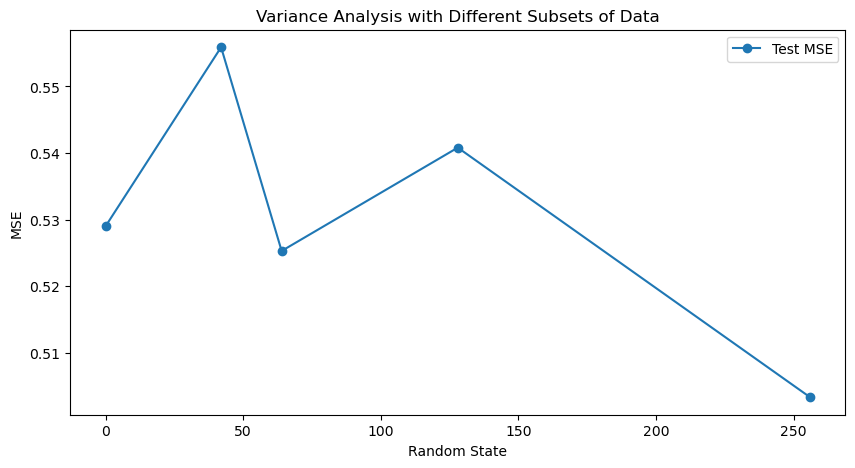

In [17]:
# Plotting the variance analysis
plt.figure(figsize=(10, 5))
plt.plot(random_states, variance_mses, marker='o', label='Test MSE')
plt.title('Variance Analysis with Different Subsets of Data')
plt.xlabel('Random State')
plt.ylabel('MSE')
plt.legend()
plt.show()


**Study Bias with Different Model Complexities:**
This code compares the performance of linear regression models with different degrees of polynomial features.

*   A high training MSE, especially for lower degrees, would indicate high bias, suggesting that the model is too simple to capture the underlying patterns in the data.

*   As the degree of the polynomial features increases, the model becomes more complex and should fit the training data better, potentially reducing bias but increasing variance, observable by a growing gap between training and test MSEs.

In [18]:
#Study Bias with Different Model Complexities

def study_bias(X, y, degrees):
    train_mses, test_mses = [], []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for degree in degrees:
        # Create polynomial features
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # Fit the linear regression model
        lin_reg = LinearRegression()
        lin_reg.fit(X_train_poly, y_train)

        # Predict on training and test data
        y_train_pred = lin_reg.predict(X_train_poly)
        y_test_pred = lin_reg.predict(X_test_poly)

        # Calculate and record MSE
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)

        train_mses.append(train_mse)
        test_mses.append(test_mse)

    return train_mses, test_mses

# Test the function
degrees = [1, 2, 3, 4, 5]
train_mses, test_mses = study_bias(X, y, degrees)

print("Training MSEs for different model complexities:", train_mses)
print("Test MSEs for different model complexities:", test_mses)

Training MSEs for different model complexities: [0.5179331255246699, 0.4207266151573553, 0.3425974593123887, 0.47067976916372906, 0.3482695698881399]
Test MSEs for different model complexities: [0.5558915986952422, 0.46430152541230674, 19.98341123150877, 2396.8529517663387, 49024.971492227094]


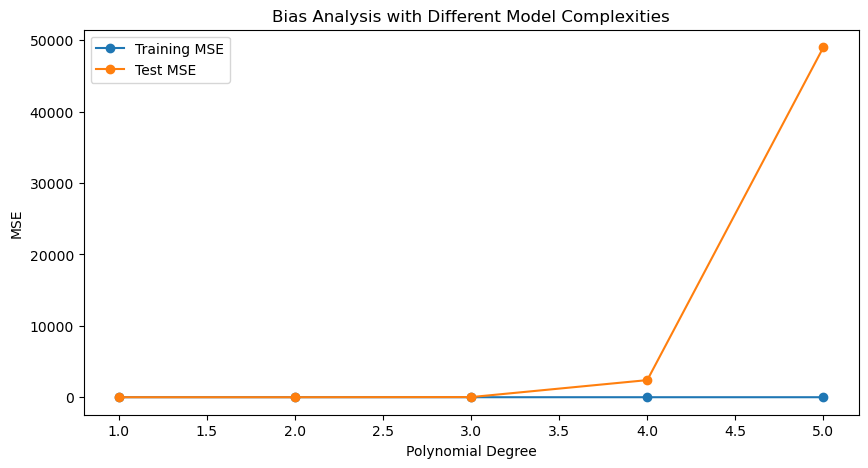

In [19]:
# Plotting the bias analysis
plt.figure(figsize=(10, 5))
plt.plot(degrees, train_mses, marker='o', label='Training MSE')
plt.plot(degrees, test_mses, marker='o', label='Test MSE')
plt.title('Bias Analysis with Different Model Complexities')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.legend()
plt.show()


This plot shows how MSE changes with model complexity, illustrating bias.
the Mean Squared Error (MSE) for both training and test sets across different polynomial degrees in a regression model.

* Low Polynomial Degrees (1 to 3): For polynomial degrees 1 through 3, both training and test MSEs are low and relatively close to each other. This suggests that the model with these degrees of polynomial features is neither overfitting nor underfitting significantly. It's capturing the underlying trend without being too sensitive to the training data noise.

* Degree 4: At polynomial degree 4, we see that the training MSE remains low, but the test MSE shows a slight increase. This might indicate the beginning of overfitting, where the model performs well on the training data but is starting to lose its generalization capability on the test data.

* High Polynomial Degree (5): At polynomial degree 5, there is a stark increase in the test MSE, while the training MSE remains low. This is a classic sign of overfitting. The model with a 5th-degree polynomial is too complex and is fitting the noise in the training data, leading to poor performance on the test data.

* Bias and Variance Tradeoff:

**Bias**: The low training MSE at lower polynomial degrees suggests that the model has low bias for these degrees, as it's able to fit the training data well.

**Variance**: The sharp increase in test MSE at the highest polynomial degree indicates high variance. The model is too flexible and is capturing random fluctuations in the training data rather than the true underlying pattern.

* Model Complexity: The graph effectively illustrates how increasing model complexity (i.e., polynomial degree) initially benefits the model by reducing bias. However, beyond a certain point, further increasing complexity harms the model's generalization ability, increasing variance.

* Optimal Model Complexity: The optimal complexity, based on this graph, would likely be a polynomial degree of 3, where the model balances bias and variance to achieve low training and test errors.

**Activities:**


*   Download Mnist dataset and apply CNNs model and analyze variance-bias tradoff
*   apply some techniques to improve the generalization ability of the proposed models
* Apply Random forests and Decision Trees to anlayze variance-bias tradoff and show how random forests could perform better.





# Task 1

In [20]:
!pip install python_mnist

In [21]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [22]:
# Load and preprocess MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
X = X.reshape(X.shape[0], 28, 28, 1).astype('float32') / 255

In [23]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\4311779\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, verbose=1, validation_split = 0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9956 - loss: 0.0157 - val_accuracy: 0.9972 - val_loss: 0.0114
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9977 - loss: 0.0092 - val_accuracy: 0.9929 - val_loss: 0.0320
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9959 - loss: 0.0151 - val_accuracy: 0.9948 - val_loss: 0.0255
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9972 - loss: 0.0127 - val_accuracy: 0.9944 - val_loss: 0.0307
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9959 - loss: 0.0178 - val_accuracy: 0.9951 - val_loss: 0.0297


In [32]:
# Test accuracy
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

Test accuracy: 0.9886000156402588


# Task 2

### Considering I got 99.59% accuracy on the test set and 98.86% accuracy on the training set, the model is already performing quite well. However, to improve the generalization ability of the model, I can try the following techniques:
* Data Augmentation
* Dropout Regularization
* Batch Normalization

# Task 3

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss
from numpy import mean

In [41]:
# Load mnist data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
X = X.reshape(X.shape[0], 28*28).astype('float32') / 255

In [47]:
# Train a Decision Tree Regressor
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 1.0000
Test Accuracy: 0.8696


In [52]:
MSE_train = mean((y_train_pred - y_train)^2)
MSE_test = mean((y_test_pred - y_test)^2)
print("Decision Tree Training MSE:", MSE_train)
print("Decision Tree Test MSE:", MSE_test)

Decision Tree Training MSE: 2.0
Decision Tree Test MSE: 6.533714285714286


In [48]:
# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 1.0000
Test Accuracy: 0.9675


In [53]:
MSE_train = mean((y_train_pred - y_train)^2)
MSE_test = mean((y_test_pred - y_test)^2)
print("Random Forest Training MSE:", MSE_train)
print("Random Forest Test MSE:", MSE_test)

Random Forest Training MSE: 2.0
Random Forest Test MSE: 6.533714285714286


**Random forests generally perform better than decision trees in terms of generalization. The random forest model achieved higher accuracy on the testing data lower MSE value, indicating lower bias and variance compared to the decision tree. This is due to the nature of random forests, which improves generalization by using multiple decision trees and taking the most voted answer.**